In [1]:
import numpy as np
import keras
from keras.models import Sequential
import tensorflow as tf
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
dataset=np.loadtxt("lstm_in10_out10_d5000_x0.1_r4.csv", delimiter=",")


i_lenght=10
o_lenght=10
data=dataset[:,0:i_lenght].copy()
label=dataset[:,i_lenght:].copy()

dtrain,dtest,ltrain,ltest=train_test_split(data,label,train_size=0.7,random_state=1)


'''
dtrain=tf.convert_to_tensor(dtrain0)
dtest=tf.convert_to_tensor(dtest0)
ltest=tf.convert_to_tensor(ltest0)
ltrain=tf.convert_to_tensor(ltrain0)'''

/home/ana/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


'\ndtrain=tf.convert_to_tensor(dtrain0)\ndtest=tf.convert_to_tensor(dtest0)\nltest=tf.convert_to_tensor(ltest0)\nltrain=tf.convert_to_tensor(ltrain0)'

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
1500/1500 [==============================] - 0s 305us/step
0.11297108811140061
n: 5 
 mse: 0.11297108811140061


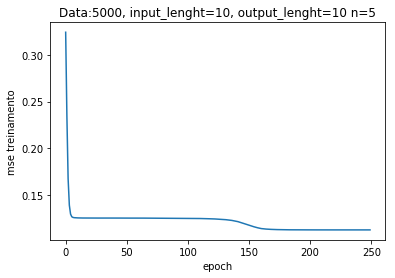

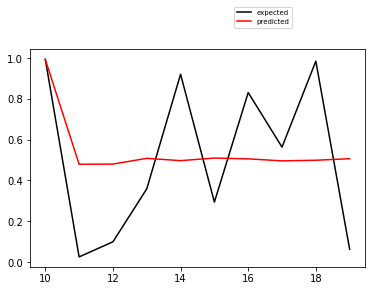

1500/1500 [==============================] - 0s 264us/step
0.11322287452220917
n: 10 
 mse: 0.11322287452220917


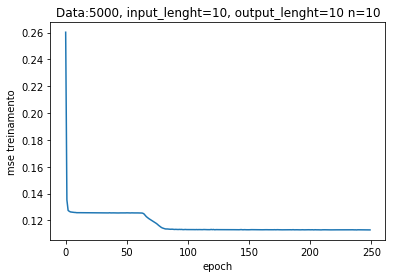

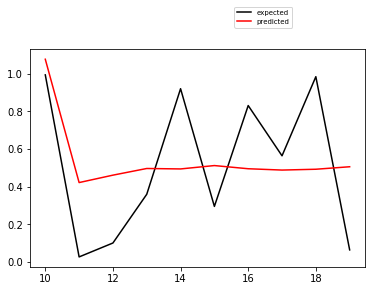

1500/1500 [==============================] - 0s 285us/step
0.10143195503950118
n: 15 
 mse: 0.10143195503950118


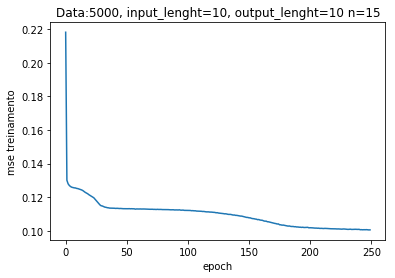

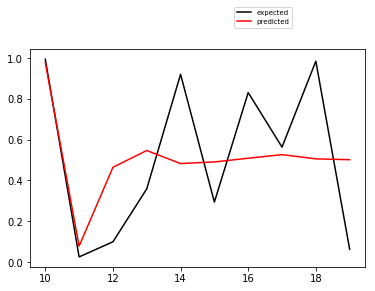

1500/1500 [==============================] - 0s 329us/step
0.0999441655476888
n: 20 
 mse: 0.0999441655476888


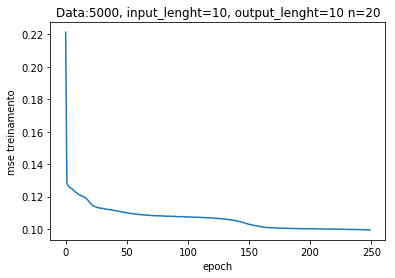

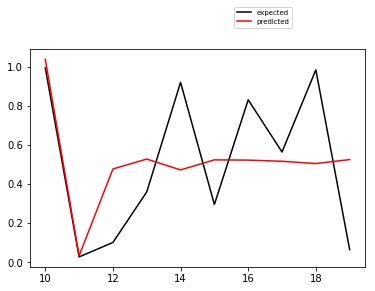

1500/1500 [==============================] - 0s 139us/step
0.09811631057659785
n: 25 
 mse: 0.09811631057659785


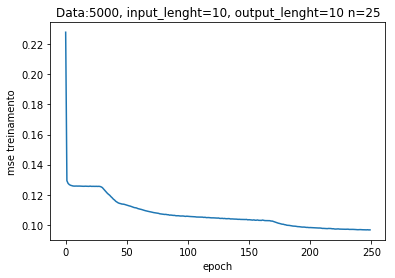

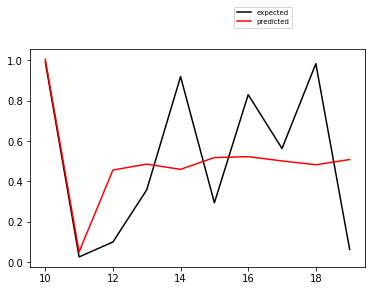

1500/1500 [==============================] - 0s 56us/step
0.10145894291003545
n: 30 
 mse: 0.10145894291003545


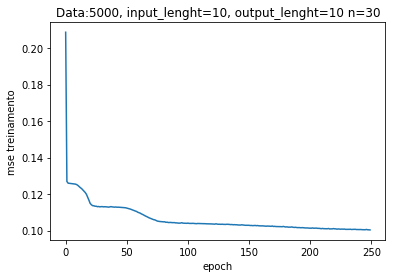

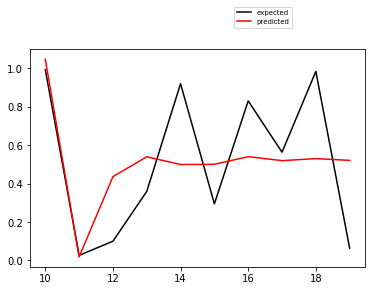

1500/1500 [==============================] - 0s 57us/step
0.1007472517689069
n: 35 
 mse: 0.1007472517689069


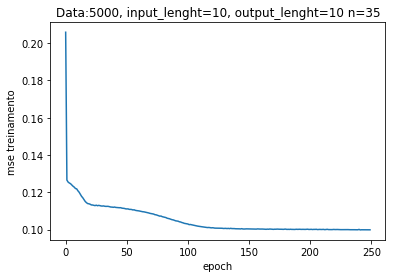

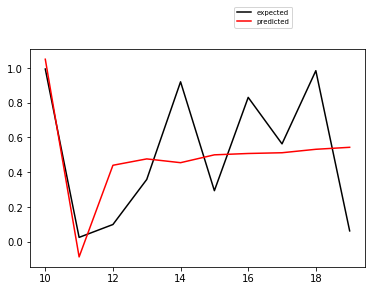

1500/1500 [==============================] - 0s 41us/step
0.1013576839764913
n: 40 
 mse: 0.1013576839764913


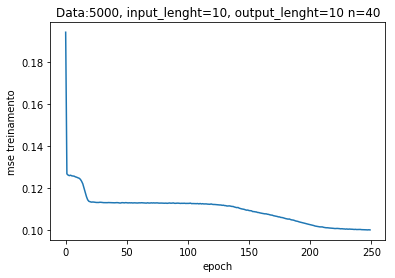

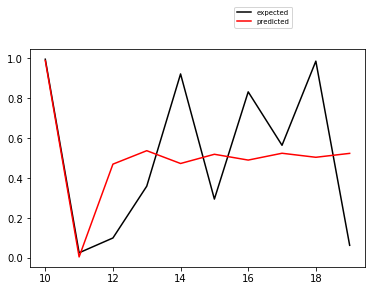

1500/1500 [==============================] - 0s 69us/step
0.09929451813300451
n: 45 
 mse: 0.09929451813300451


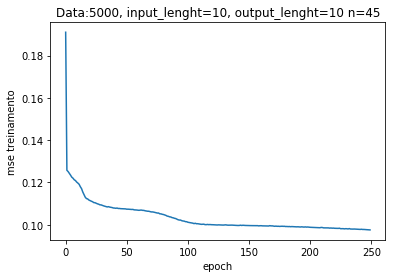

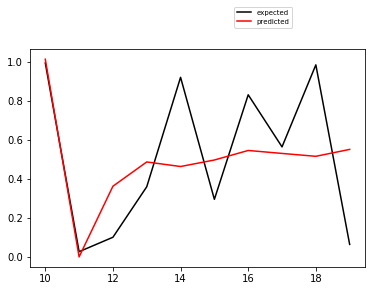

1500/1500 [==============================] - 0s 64us/step
0.09853423070907592
n: 50 
 mse: 0.09853423070907592


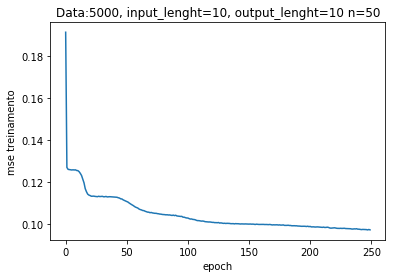

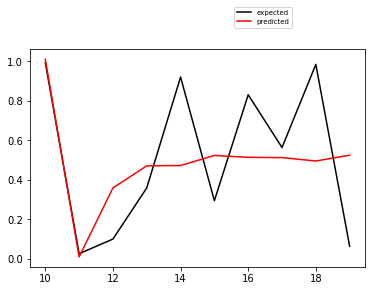

1500/1500 [==============================] - 0s 68us/step
0.09736501437425614
n: 60 
 mse: 0.09736501437425614


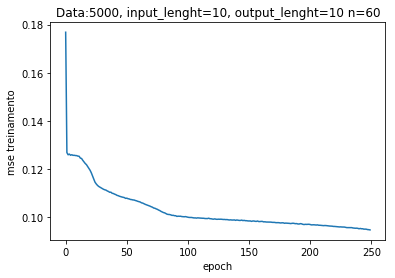

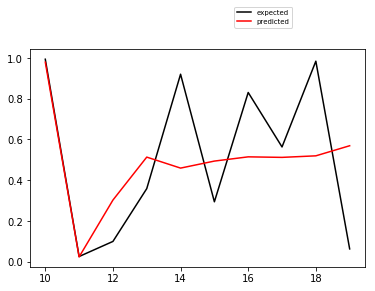

1500/1500 [==============================] - 0s 77us/step
0.09340669373671213
n: 70 
 mse: 0.09340669373671213


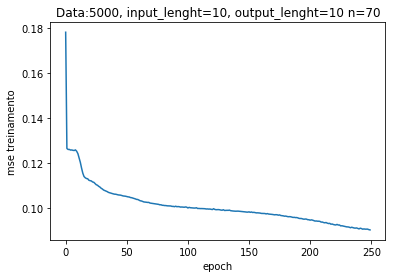

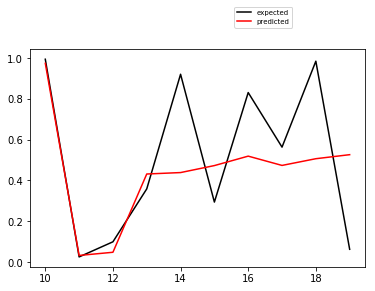

1500/1500 [==============================] - 0s 47us/step
0.09684331427017848
n: 80 
 mse: 0.09684331427017848


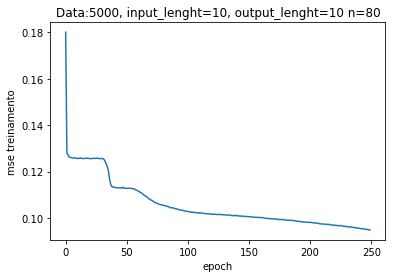

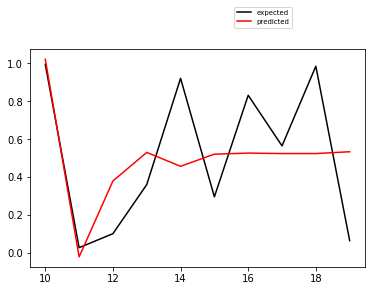

1500/1500 [==============================] - 0s 72us/step
0.09236035321156184
n: 90 
 mse: 0.09236035321156184


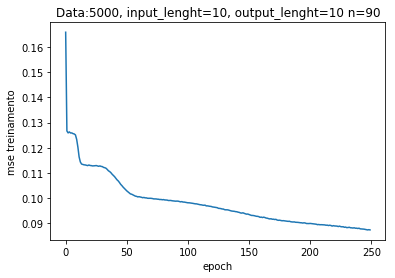

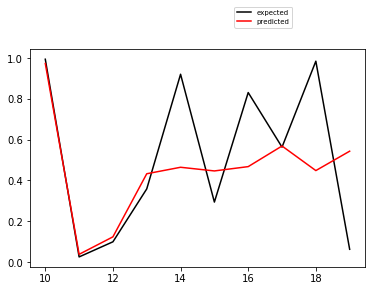

1500/1500 [==============================] - 0s 73us/step
0.09587167257070542
n: 100 
 mse: 0.09587167257070542


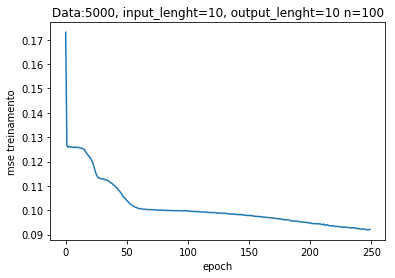

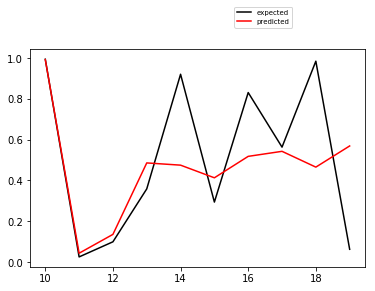

1500/1500 [==============================] - 0s 82us/step
0.09336684246857961
n: 200 
 mse: 0.09336684246857961


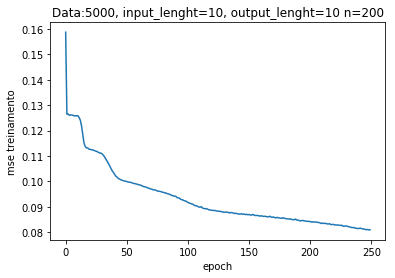

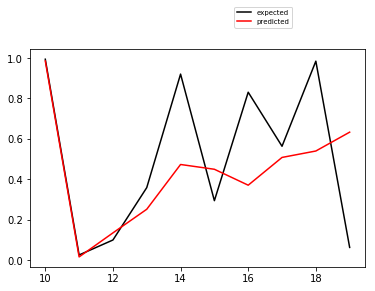

1500/1500 [==============================] - 0s 146us/step
0.09002414830525717
n: 300 
 mse: 0.09002414830525717


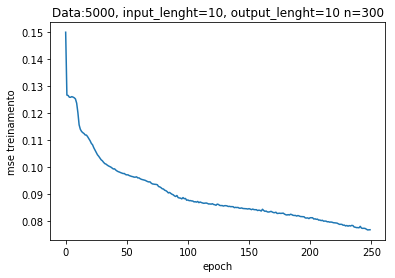

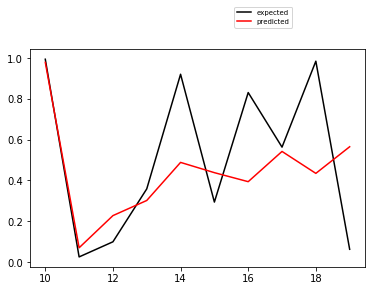

1500/1500 [==============================] - 0s 115us/step
0.10381754459937413
n: 400 
 mse: 0.10381754459937413


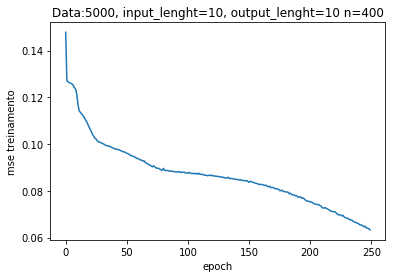

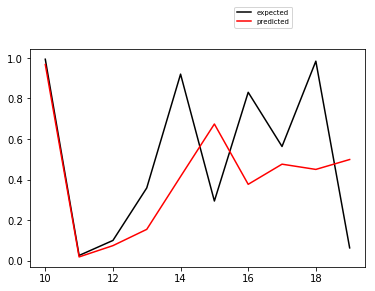

1500/1500 [==============================] - 0s 252us/step
0.10103194119532903
n: 500 
 mse: 0.10103194119532903


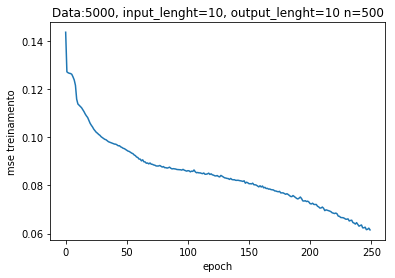

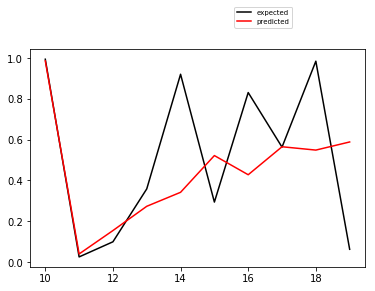

1500/1500 [==============================] - 0s 245us/step
0.11062554200490315
n: 600 
 mse: 0.11062554200490315


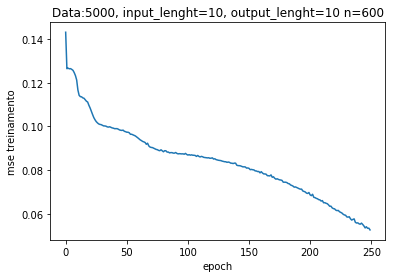

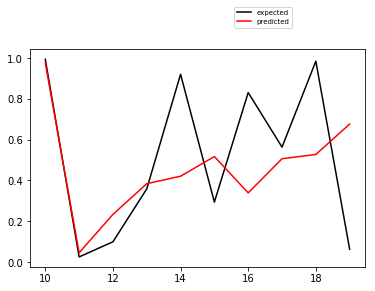

1500/1500 [==============================] - 1s 390us/step
0.10495707676808039
n: 700 
 mse: 0.10495707676808039


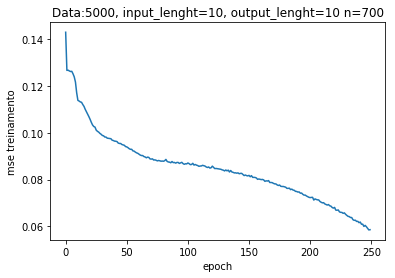

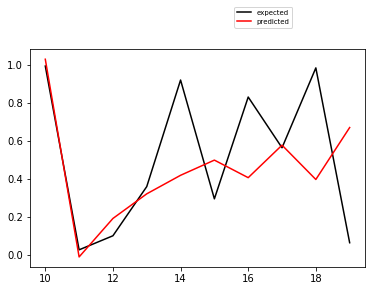

1500/1500 [==============================] - 2s 1ms/step
0.11080993123849232
n: 800 
 mse: 0.11080993123849232


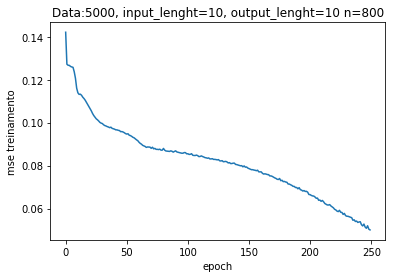

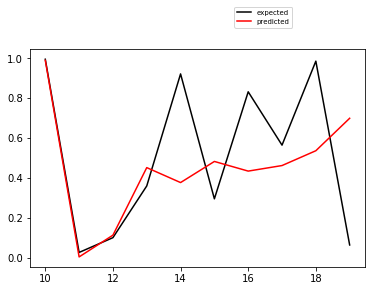

1500/1500 [==============================] - 2s 1ms/step
0.11735191682974498
n: 900 
 mse: 0.11735191682974498


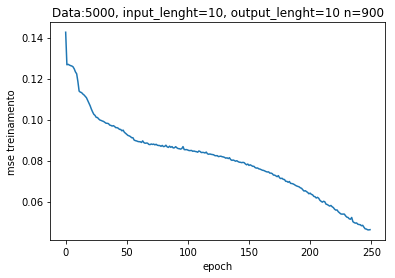

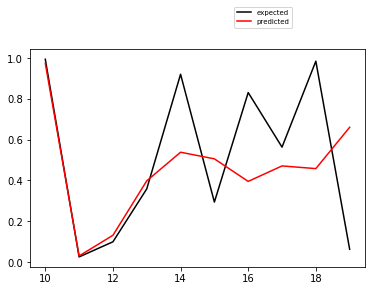

In [ ]:
results = []

n = 5
while n<=1000:
    
    model = Sequential()
    model.add(keras.layers.LSTM(n, activation='relu', input_shape=(i_lenght, 1)))
    model.add(keras.layers.Dense(o_lenght)) 

    model.compile(optimizer=keras.optimizers.Adam(),loss='mean_squared_error')
    
    dtrain = dtrain.reshape((dtrain.shape[0],i_lenght,1))
    dtest = dtest.reshape((dtest.shape[0],o_lenght,1))
    
    history = model.fit(dtrain, ltrain, epochs=250,verbose=0)
    
    msetrain = model.evaluate(dtrain, ltrain)
    mse = model.evaluate(dtest, ltest)
    print(mse)
    
    line = np.empty((3))
    line = n, msetrain, mse
    
    results.append(line)
    
    print('n:',n,'\n mse:',mse)
    
    plt.plot(history.history['loss'])
    plt.title('Data:5000, input_lenght=10, output_lenght=10 n=%d' %n)
    plt.ylabel('mse treinamento')
    plt.xlabel('epoch')
    plt.show()
    
    prediction = model.predict(dtest[0,:].reshape((1,o_lenght,1)))
    
    
    plt.plot(range(i_lenght,i_lenght+o_lenght),ltest[0,:],'k',label="expected")
    plt.plot(range(i_lenght,i_lenght+o_lenght),prediction.T,'r', label="predicted")
    lo,hi = plt.ylim()
    #plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
    plt.legend(loc=(0.61,1.1),fontsize='x-small')
    plt.show()
    
    if n < 50:
        n = n+5
    elif n < 100:
        n = n+10
    elif n < 1000:
        n = n+100
    else:
        n = n+1000
        
print(results)
            


    


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
1500/1500 [==============================] - 0s 98us/step
0.11209826825062434
n: 10 
 mse: 0.11209826825062434


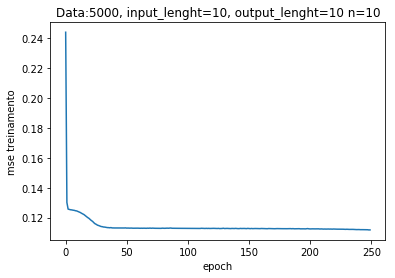

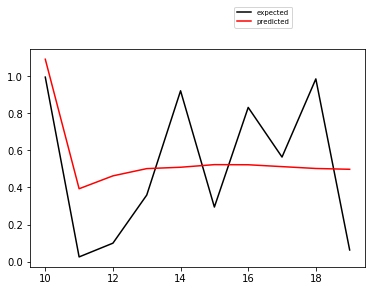

1500/1500 [==============================] - 0s 93us/step
0.0997631535132726
n: 15 
 mse: 0.0997631535132726


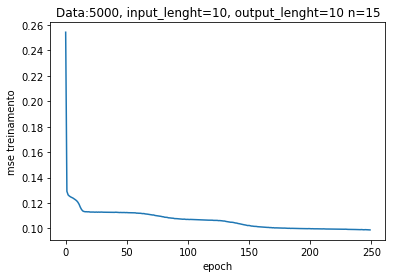

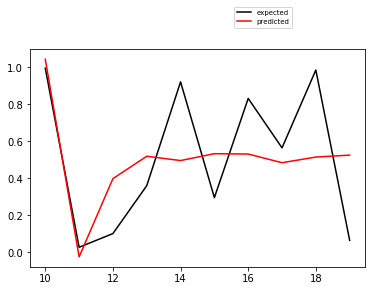

1500/1500 [==============================] - 0s 72us/step
0.10052462736765544
n: 20 
 mse: 0.10052462736765544


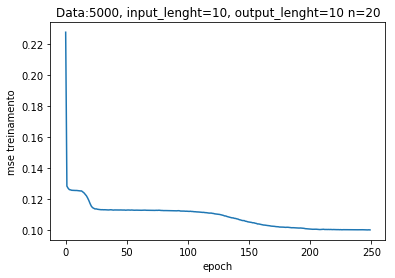

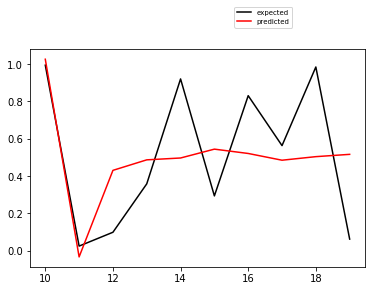

1500/1500 [==============================] - 0s 70us/step
0.09241629791259766
n: 25 
 mse: 0.09241629791259766


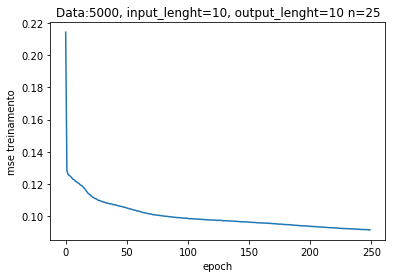

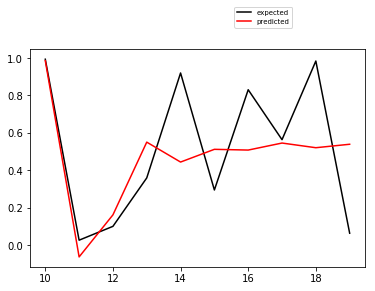

1500/1500 [==============================] - 0s 95us/step
0.10058445483446121
n: 30 
 mse: 0.10058445483446121


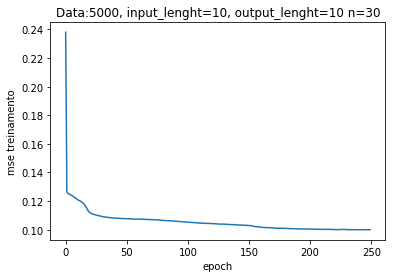

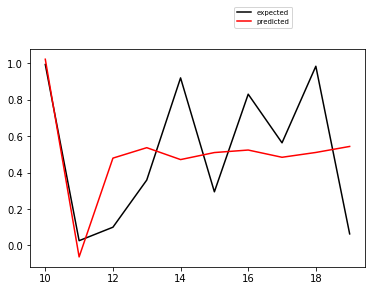

1500/1500 [==============================] - 0s 99us/step
0.09111017771561941
n: 35 
 mse: 0.09111017771561941


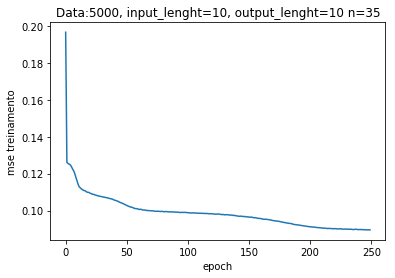

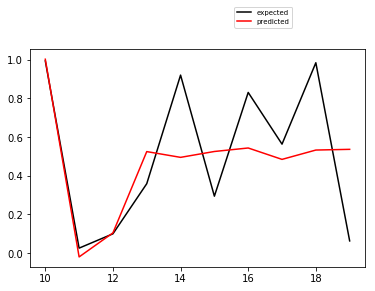

1500/1500 [==============================] - 0s 74us/step
0.09997212600708008
n: 40 
 mse: 0.09997212600708008


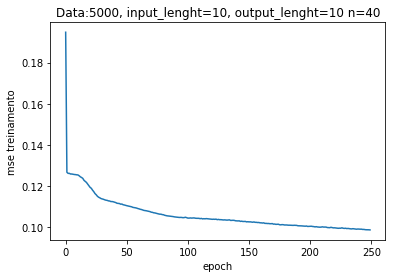

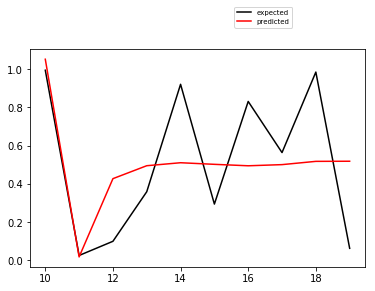

1500/1500 [==============================] - 0s 112us/step
0.09178899977604549
n: 45 
 mse: 0.09178899977604549


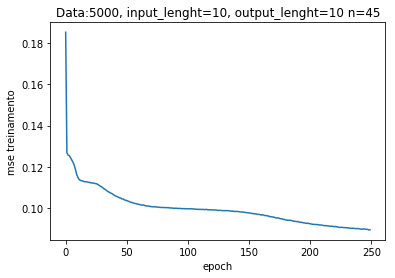

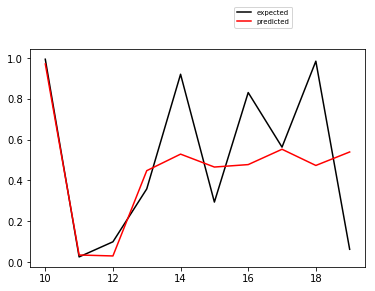

1500/1500 [==============================] - 0s 87us/step
0.09657997914155324
n: 50 
 mse: 0.09657997914155324


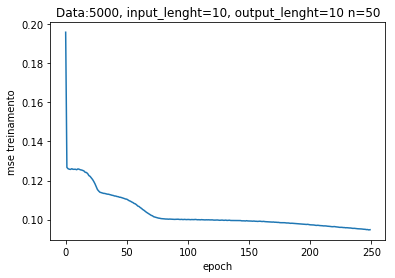

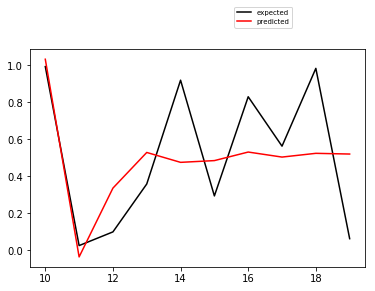

1500/1500 [==============================] - 0s 88us/step
0.09045861671368281
n: 60 
 mse: 0.09045861671368281


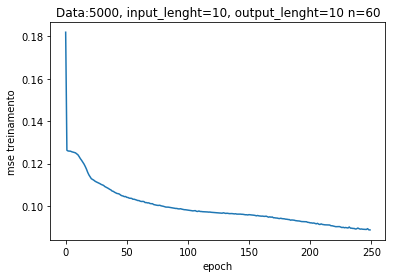

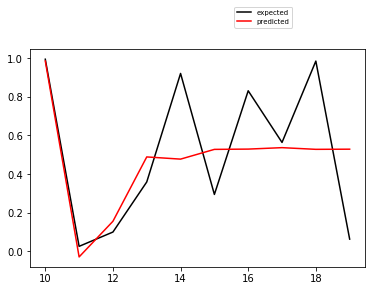

1500/1500 [==============================] - 0s 96us/step
0.09108171939849853
n: 70 
 mse: 0.09108171939849853


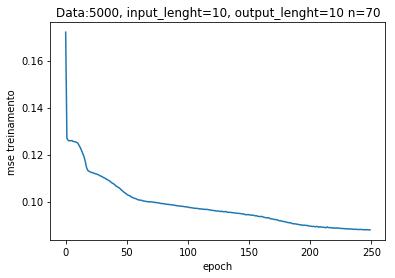

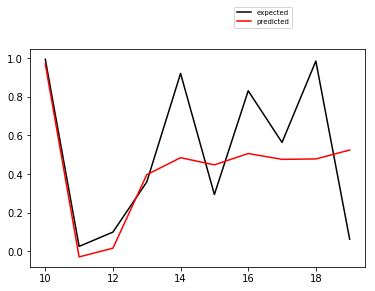

1500/1500 [==============================] - 0s 91us/step
0.09189345188935598
n: 80 
 mse: 0.09189345188935598


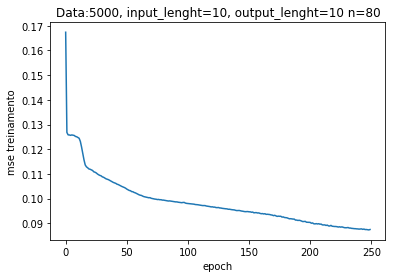

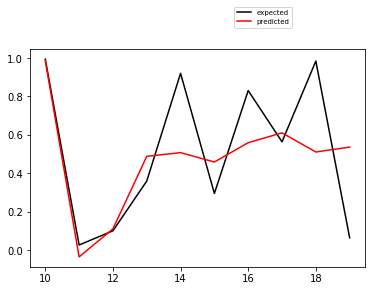

1500/1500 [==============================] - 0s 93us/step
0.09292494201660156
n: 90 
 mse: 0.09292494201660156


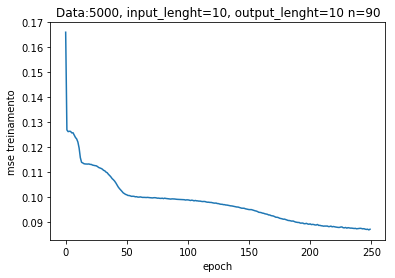

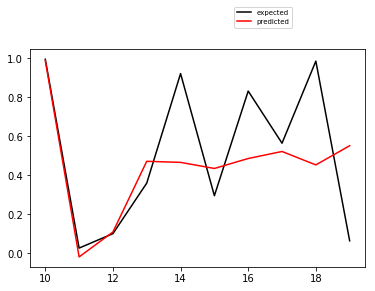

1500/1500 [==============================] - 0s 94us/step
0.09089540962378184
n: 100 
 mse: 0.09089540962378184


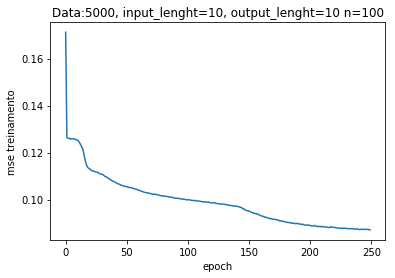

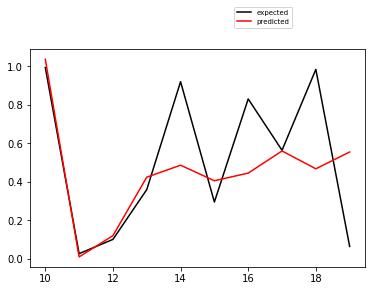

1500/1500 [==============================] - 0s 120us/step
0.0957094164888064
n: 200 
 mse: 0.0957094164888064


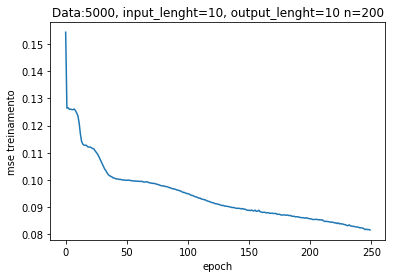

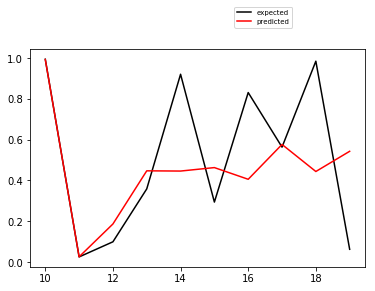

1500/1500 [==============================] - 0s 149us/step
0.09757632893323899
n: 300 
 mse: 0.09757632893323899


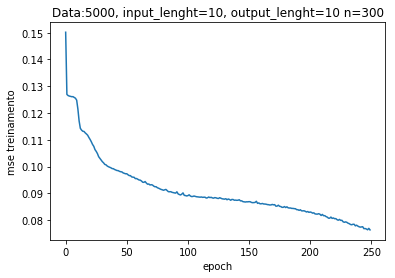

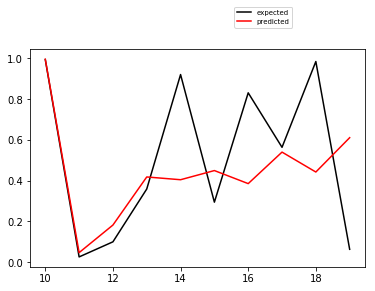

1500/1500 [==============================] - 1s 513us/step
0.10275123735268911
n: 400 
 mse: 0.10275123735268911


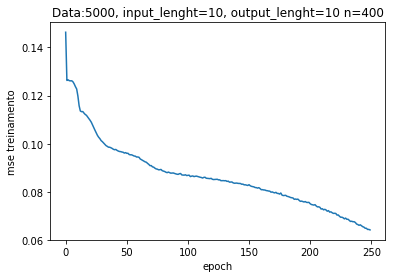

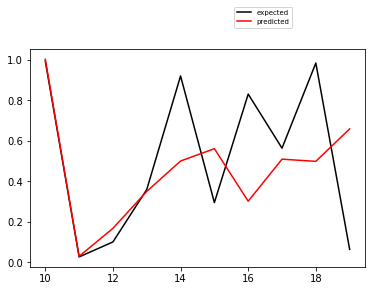

1500/1500 [==============================] - 1s 784us/step
0.10485149226586024
n: 500 
 mse: 0.10485149226586024


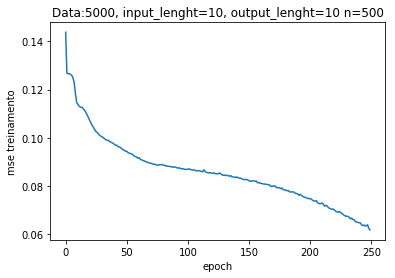

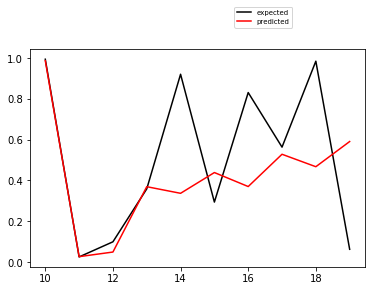

1500/1500 [==============================] - 1s 714us/step
0.10245919670661291
n: 600 
 mse: 0.10245919670661291


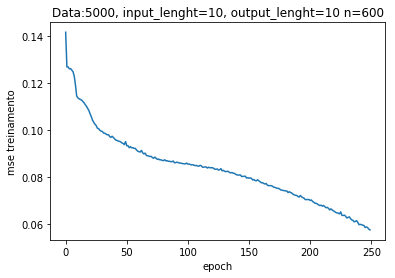

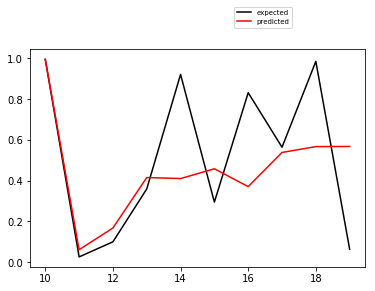

1500/1500 [==============================] - 1s 356us/step
0.1103466255068779
n: 700 
 mse: 0.1103466255068779


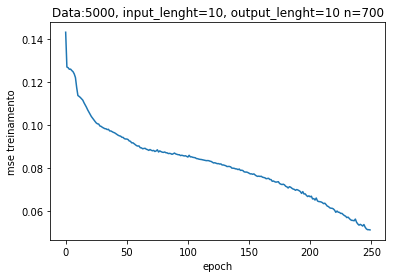

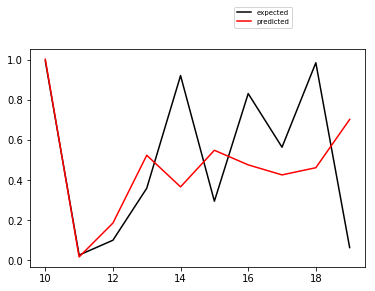

1500/1500 [==============================] - 1s 444us/step
0.11461300837993622
n: 800 
 mse: 0.11461300837993622


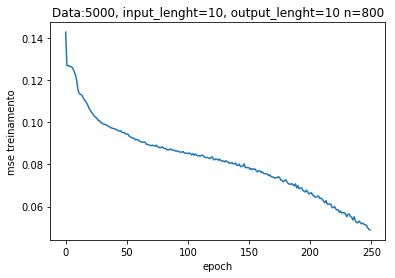

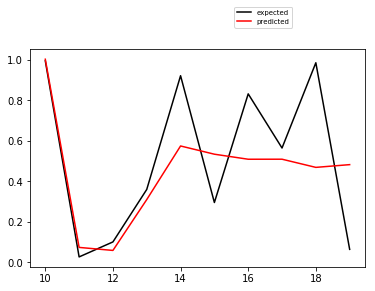

1500/1500 [==============================] - 2s 1ms/step
0.10728206141789755
n: 900 
 mse: 0.10728206141789755


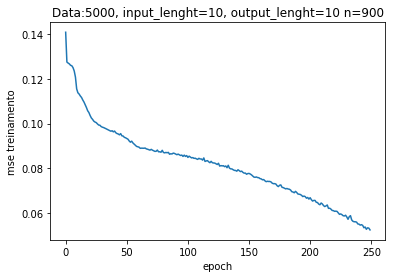

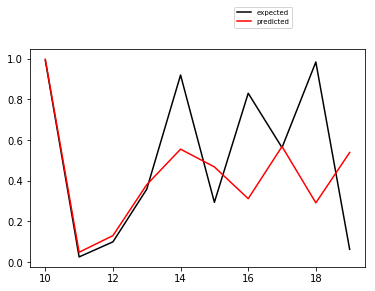

1500/1500 [==============================] - 2s 2ms/step
0.11838471160332362
n: 1000 
 mse: 0.11838471160332362


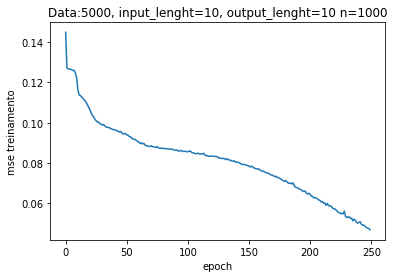

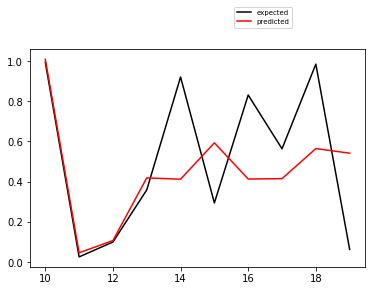

[(10, 0.11159104705708367, 0.11209826825062434), (15, 0.09876662108727864, 0.0997631535132726), (20, 0.09996800021614347, 0.10052462736765544), (25, 0.09156376371213368, 0.09241629791259766), (30, 0.09972627369846616, 0.10058445483446121), (35, 0.08952573562519892, 0.09111017771561941), (40, 0.09849830375398909, 0.09997212600708008), (45, 0.08942428325755256, 0.09178899977604549), (50, 0.09443028167315892, 0.09657997914155324), (60, 0.08847040044409889, 0.09045861671368281), (70, 0.08789804823909488, 0.09108171939849853), (80, 0.08721063284363065, 0.09189345188935598), (90, 0.08681494061435972, 0.09292494201660156), (100, 0.08694619864225388, 0.09089540962378184), (200, 0.08054532470021929, 0.0957094164888064), (300, 0.07489865182127271, 0.09757632893323899), (400, 0.06274924705283982, 0.10275123735268911), (500, 0.05944164867060525, 0.10485149226586024), (600, 0.05498053516660418, 0.10245919670661291), (700, 0.04811457767231124, 0.1103466255068779), (800, 0.04674854658756937, 0.114613

In [3]:
results = []

n = 10
while n<=1000:
    
    model = Sequential()
    model.add(keras.layers.LSTM(n, activation='relu', input_shape=(i_lenght, 1)))
    model.add(keras.layers.Dense(o_lenght)) 

    model.compile(optimizer=keras.optimizers.Adam(),loss='mean_squared_error')
    
    dtrain = dtrain.reshape((dtrain.shape[0],i_lenght,1))
    dtest = dtest.reshape((dtest.shape[0],o_lenght,1))
    
    history = model.fit(dtrain, ltrain, epochs=250,verbose=0)
    
    msetrain = model.evaluate(dtrain, ltrain)
    mse = model.evaluate(dtest, ltest)
    print(mse)
    
    line = np.empty((3))
    line = n, msetrain, mse
    
    results.append(line)
    
    print('n:',n,'\n mse:',mse)
    
    plt.plot(history.history['loss'])
    plt.title('Data:5000, input_lenght=10, output_lenght=10 n=%d' %n)
    plt.ylabel('mse treinamento')
    plt.xlabel('epoch')
    plt.show()
    
    prediction = model.predict(dtest[0,:].reshape((1,o_lenght,1)))
    
    
    plt.plot(range(i_lenght,i_lenght+o_lenght),ltest[0,:],'k',label="expected")
    plt.plot(range(i_lenght,i_lenght+o_lenght),prediction.T,'r', label="predicted")
    lo,hi = plt.ylim()
    #plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
    plt.legend(loc=(0.61,1.1),fontsize='x-small')
    plt.show()
    
    if n < 50:
        n = n+5
    elif n < 100:
        n = n+10
    elif n < 1000:
        n = n+100
    else:
        n = n+1000
        
print(results)
            


    


[[1.00000000e+01 1.11591047e-01 1.12098268e-01]
 [1.50000000e+01 9.87666211e-02 9.97631535e-02]
 [2.00000000e+01 9.99680002e-02 1.00524627e-01]
 [2.50000000e+01 9.15637637e-02 9.24162979e-02]
 [3.00000000e+01 9.97262737e-02 1.00584455e-01]
 [3.50000000e+01 8.95257356e-02 9.11101777e-02]
 [4.00000000e+01 9.84983038e-02 9.99721260e-02]
 [4.50000000e+01 8.94242833e-02 9.17889998e-02]
 [5.00000000e+01 9.44302817e-02 9.65799791e-02]
 [6.00000000e+01 8.84704004e-02 9.04586167e-02]
 [7.00000000e+01 8.78980482e-02 9.10817194e-02]
 [8.00000000e+01 8.72106328e-02 9.18934519e-02]
 [9.00000000e+01 8.68149406e-02 9.29249420e-02]
 [1.00000000e+02 8.69461986e-02 9.08954096e-02]
 [2.00000000e+02 8.05453247e-02 9.57094165e-02]
 [3.00000000e+02 7.48986518e-02 9.75763289e-02]
 [4.00000000e+02 6.27492471e-02 1.02751237e-01]
 [5.00000000e+02 5.94416487e-02 1.04851492e-01]
 [6.00000000e+02 5.49805352e-02 1.02459197e-01]
 [7.00000000e+02 4.81145777e-02 1.10346626e-01]
 [8.00000000e+02 4.67485466e-02 1.146130

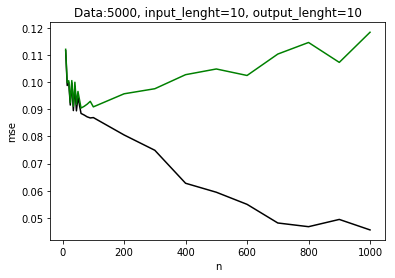

In [4]:
results = np.asarray(results)

print(results)
results_c=results.copy()

plt.plot(results[:,0],results[:,1], 'k',label='train')
plt.title('Data:5000, input_lenght=10, output_lenght=10')
plt.ylabel('mse ')
plt.xlabel('n')

plt.plot(results[:,0],results[:,2],'g',label='test')
plt.title('Data:5000, input_lenght=10, output_lenght=10')
plt.ylabel('mse')
plt.xlabel('n')
          
          
plt.show()